In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys

from tqdm import tqdm
import mynn as nn
from dataset.mnist_load import *

############################################ Settings ############################################
np.random.seed(309)
        
model = nn.Model(module = nn.module.CNN(),
                optimizer = nn.optimizer.MomentGD(init_lr=0.06, mu=0.95),
                scheduler = nn.lr_scheduler.MultiStepLR(milestones=[800, 2400, 4000], gamma=0.5),
                loss_fn = 'CrossEntropyLoss'
                )

save_folder = "saved_models/idx08_conv"
save_path = f"{save_folder}/best_model.pickle"

epochs = 10000
bsz = 4096
patience = 500 

val_size = 10000
##################################################################################################

train_images = load_images('dataset/train-images-idx3-ubyte').reshape(-1, 1, 28, 28) / 255.0
train_labels = load_labels('dataset/train-labels-idx1-ubyte')
test_images = load_images('dataset/t10k-images-idx3-ubyte').reshape(-1, 1, 28, 28) / 255.0
test_labels = load_labels('dataset/t10k-labels-idx1-ubyte')
indices = np.random.permutation(len(train_images))
train_indices = indices[val_size:]
val_indices = indices[:val_size]
train_images, val_images = train_images[train_indices], train_images[val_indices]
train_labels, val_labels = train_labels[train_indices], train_labels[val_indices]

print(f"Training data shape: {train_images.shape}")
print(f"Each image shape:{train_images[0].shape}")
print(f"Validation data shape: {val_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation labels shape: {val_labels.shape}")

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

save_path = f"{save_folder}/best_model.pickle"

magic, num_imgs, rows, cols: 2051 60000 28 28
magic, num_labels: 2049 60000
magic, num_imgs, rows, cols: 2051 10000 28 28
magic, num_labels: 2049 10000
Training data shape: (50000, 1, 28, 28)
Each image shape:(1, 28, 28)
Validation data shape: (10000, 1, 28, 28)
Training labels shape: (50000,)
Validation labels shape: (10000,)


In [11]:
# Assuming 'conv_layer' is your convolutional layer from the CNN model
CNN_Layer = model.module.layers[0]
visualize_input_kernel_output(CNN_Layer.input, CNN_Layer.kernel_size, CNN_Layer.output)

Model loaded from saved_models/idx08_conv/model_1.pickle


In [139]:
train_X = train_images[:2]
train_y = train_labels[:2]

In [140]:
layer = nn.op.conv2D(in_channels=1, out_channels=3, kernel_size=3, stride=2, padding=1, weight_decay=True)

In [141]:
output = layer(train_X)

In [144]:
output.shape

(2, 4, 14, 14)

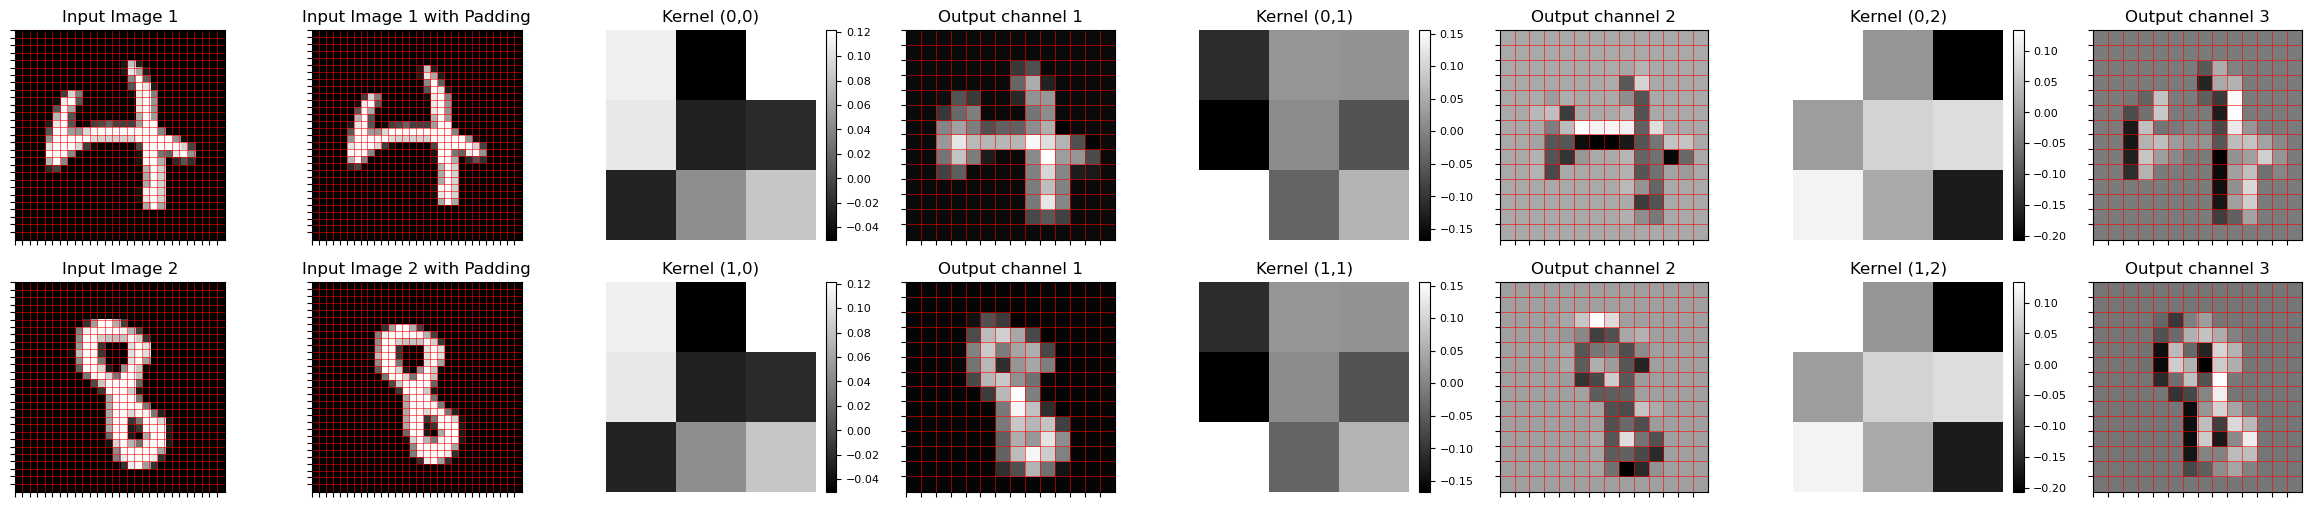

In [188]:
X_padded = np.pad(train_X, 
                ((0, 0), (0, 0), (1, 1), (1, 1)),
                'constant')

img_origin = train_X.squeeze()
img = X_padded.squeeze()
img_output = output

fig, ax = plt.subplots(2, 8, figsize=(30, 6))

for i in range(2):
    ax[i, 0].imshow(img_origin[i], cmap='gray')
    ax[i, 0].set_xticks(np.arange(0, img_origin[i].shape[1], 1) - 0.6)
    ax[i, 0].set_yticks(np.arange(0, img_origin[i].shape[0], 1) - 0.6)
    ax[i, 0].grid(True, which='major', axis='both', color='red', linewidth=0.4)
    ax[i, 0].tick_params(label1On=False, label2On=False)
    ax[i, 0].set_title(f"Input Image {i+1}")
    
    ax[i, 1].imshow(img[i], cmap='gray')
    ax[i, 1].set_xticks(np.arange(0, img[i].shape[1], 1) - 0.6)
    ax[i, 1].set_yticks(np.arange(0, img[i].shape[0], 1) - 0.6)
    ax[i, 1].grid(True, which='major', axis='both', color='red', linewidth=0.4)
    ax[i, 1].tick_params(label1On=False, label2On=False)
    ax[i, 1].set_title(f"Input Image {i+1} with Padding")
    
    for k in range(3):
        kernel = layer.params['W'][k, 0]
        cax = ax[i, 2+2*k].imshow(kernel, cmap='gray', interpolation='nearest')
        cbar = plt.colorbar(cax, fraction=0.046, pad=0.04)
        cbar.ax.tick_params(labelsize=8)
        ax[i, 2+2*k].axis('off')
        ax[i, 2+2*k].set_title(f'Kernel ({i},{k})')
    
        ax[i, 3+2*k].imshow(img_output[i, k], cmap='gray')
        ax[i, 3+2*k].set_xticks(np.arange(0, img_output[i, k].shape[1], 1) - 0.5)
        ax[i, 3+2*k].set_yticks(np.arange(0, img_output[i, k].shape[0], 1) - 0.6)
        ax[i, 3+2*k].grid(True, which='major', axis='both', color='red', linewidth=0.4)
        ax[i, 3+2*k].tick_params(label1On=False, label2On=False)
        ax[i, 3+2*k].set_title(f"Output channel {k+1}")

plt.show()

In [195]:
layer2 = nn.op.MaxPool2D(pool_size=(2,2), stride=2, padding=0)
output2 = layer2(output)

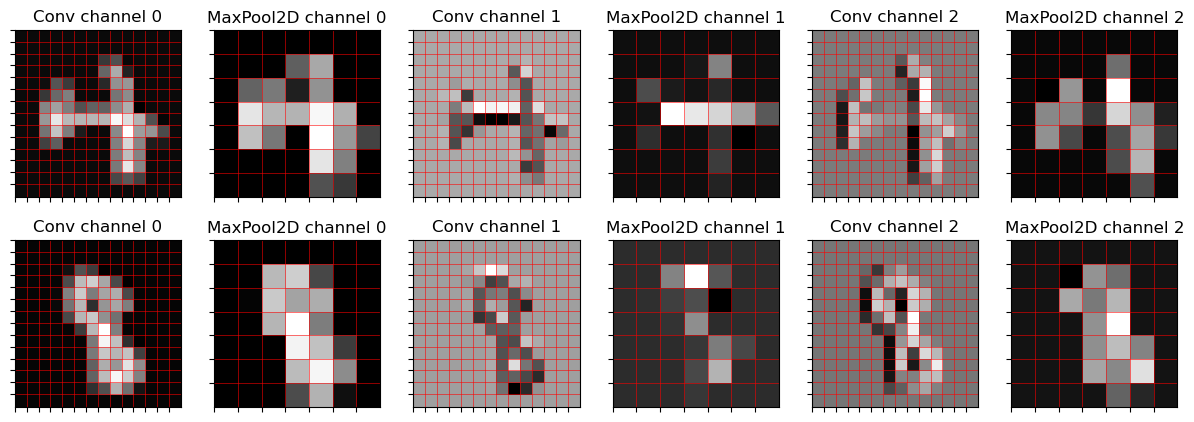

In [199]:
fig, ax = plt.subplots(2, 6, figsize=(15, 5))
for i in range(2):
    for k in range(3):
        ax[i, 2*k].imshow(img_output[i, k], cmap='gray')
        ax[i, 2*k].set_xticks(np.arange(0, img_output[i, k].shape[1], 1) - 0.5)
        ax[i, 2*k].set_yticks(np.arange(0, img_output[i, k].shape[0], 1) - 0.6)
        ax[i, 2*k].grid(True, which='major', axis='both', color='red', linewidth=0.4)
        ax[i, 2*k].tick_params(label1On=False, label2On=False)
        ax[i, 2*k].set_title(f"Conv channel {k}")
        
        ax[i, 2*k+1].imshow(output2[i, k], cmap='gray')
        ax[i, 2*k+1].set_xticks(np.arange(0, output2[i, k].shape[1], 1) - 0.5)
        ax[i, 2*k+1].set_yticks(np.arange(0, output2[i, k].shape[0], 1) - 0.5)
        ax[i, 2*k+1].grid(True, which='major', axis='both', color='red', linewidth=0.4)
        ax[i, 2*k+1].tick_params(label1On=False, label2On=False)
        ax[i, 2*k+1].set_title(f"MaxPool2D channel {k}")

plt.show()